## Import Libraries

In [10]:
import os
import sys
from pathlib import Path
sys.path.append(os.getcwd())
sys.path.append(str(Path(os.getcwd()).parent))
sys.path.append(os.path.join(os.getcwd(), 'utils'))
import matplotlib.pyplot as plt
from configuration import *
import torch
import numpy as np
import pprint
import pNN_Power_Aware as pNN
from utils import *

args = parser.parse_args([])
args = FormulateArgs(args)

args.powerestimator = 'AL'

## Constant values

In [7]:
target = [[ 200.,  240.,  400.,  500.,  300.,  300.,  200.,  300.,  600.,  280.,  340.,  280.,  240.],
          [ 400.,  480.,  800., 1000.,  600.,  600.,  400.,  600., 1200.,  560.,  680.,  560.,  480.],
          [ 600.,  720., 1200., 1500.,  900.,  900.,  600.,  900., 1800.,  840., 1020.,  840.,  720.],
          [ 800.,  960., 1600., 2000., 1200., 1200.,  800., 1200., 2400., 1120., 1360., 1120.,  960.]]

target = np.array(target)
target.shape

(4, 13)

## Check the model existence

In [ ]:
from tqdm.notebook import tqdm


for ds in tqdm(range(13), desc="Datasets"):
    args.DATASET = ds
    valid_loader, datainfo = GetDataLoader(args, 'valid', path='../dataset/')
    test_loader, datainfo = GetDataLoader(args, 'test', path='../dataset/')
    print(datainfo)

    for p, power in enumerate(tqdm(target[:,ds], desc="Power", leave=False)):
        
        args.powerbalance = power
        
        for seed in tqdm(range(10), desc="Seeds", leave=False):

            args.SEED = seed

            setup = f"data_{datainfo['dataname']}_seed_{args.SEED}_Penalty_{args.powerestimator}_Factor_{int(args.powerbalance):04d}"

            model_PT_name = f'./models/pNN_{setup}.model'
            model_FT_name = f'./models/pNN_{setup}_FT.model'
            
            try:
                model_PT = torch.load(model_PT_name)
            except Exception as e:
                print(f"Error loading model_PT: {model_PT_name}")
                print(e)
                continue
            
            try:
                model_FT = torch.load(model_FT_name)
            except Exception as e:
                print(f"Error loading model_FT: {model_FT_name}")
                print(e)
                continue


## Evalute model on val-test set

In [ ]:
# from tqdm.notebook import tqdm

# results = torch.zeros([10, 4, 13, 8])

# evaluator = Evaluator(args).to(args.DEVICE)

# for ds in tqdm(range(13), desc="Datasets"):
#     args.DATASET = ds
#     valid_loader, datainfo = GetDataLoader(args, 'valid', path='../dataset/')
#     test_loader, datainfo = GetDataLoader(args, 'test', path='../dataset/')
#     print(datainfo)

#     for p, power in enumerate(tqdm(target[:,ds], desc="Power", leave=False)):
        
#         args.powerbalance = power
        
#         for seed in tqdm(range(10), desc="Seeds", leave=False):

#             args.SEED = seed
            
#             for x, y in valid_loader:
#                 X_valid, y_valid = x.to(args.DEVICE), y.to(args.DEVICE)
#             for x, y in test_loader:
#                 X_test, y_test = x.to(args.DEVICE), y.to(args.DEVICE)

#             setup = f"data_{datainfo['dataname']}_seed_{args.SEED}_Penalty_{args.powerestimator}_Factor_{int(args.powerbalance):04d}"

#             model_PT_name = f'./models/pNN_{setup}.model'
#             model_FT_name = f'./models/pNN_{setup}_FT.model'
#             # model_FT_RESET_name = f'./models/pNN_{setup}_FT_reset.model'
            
#             try:
#                 model_PT = torch.load(model_PT_name)
#             except Exception as e:
#                 print(f"Error loading model_PT: {model_PT_name}")
#                 print(e)
#                 continue
            
#             try:
#                 model_FT = torch.load(model_FT_name)
#             except Exception as e:
#                 print(f"Error loading model_FT: {model_FT_name}")
#                 print(e)
#                 continue

#             # try:
#             #     model_FT_RESET = torch.load(model_FT_RESET_name)
#             # except Exception as e:
#             #     print(f"Error loading model_FT: {model_FT_RESET_name}")
#             #     print(e)
#             #     continue
            
#             acc_valid_pt, power_valid_pt = evaluator(model_PT, X_valid, y_valid)
#             acc_test_pt, power_test_pt = evaluator(model_PT, X_test, y_test)

#             acc_valid_ft, power_valid_ft = evaluator(model_FT, X_valid, y_valid)
#             acc_test_ft, power_test_ft = evaluator(model_FT, X_test, y_test)

#             # acc_valid_ft_reset, power_valid_ft_reset = evaluator(model_FT_RESET, X_valid, y_valid)
#             # acc_test_ft_reset, power_test_ft_reset = evaluator(model_FT_RESET, X_test, y_test)
            
#             results[seed, p, ds, 0] = acc_valid_pt
#             results[seed, p, ds, 1] = power_valid_pt.cpu().item() * 1000000
#             results[seed, p, ds, 2] = acc_test_pt
#             results[seed, p, ds, 3] = power_test_pt.cpu().item() * 1000000

#             results[seed, p, ds, 4] = acc_valid_ft
#             results[seed, p, ds, 5] = power_valid_ft.cpu().item() * 1000000
#             results[seed, p, ds, 6] = acc_test_ft
#             results[seed, p, ds, 7] = power_test_ft.cpu().item() * 1000000

#             # results[seed, p, ds, 8] = acc_valid_ft_reset
#             # results[seed, p, ds, 9] = power_valid_ft_reset.cpu().item() * 1000000
#             # results[seed, p, ds, 10] = acc_test_ft_reset
#             # results[seed, p, ds, 11] = power_test_ft_reset.cpu().item() * 1000000


In [ ]:
# torch.save(results, './result.matrix')
# torch.save(results, '../RESULT/result_AL_hs.matrix')

## Visualize data

### Load data

In [11]:
results = torch.load('./result.matrix')
results.shape

torch.Size([10, 4, 13, 8])

In [12]:
sys.path.append('../utils/')
import FigureConfig as FC

In [13]:
ds = 5
result_temp = results[:,:,ds,:]
result_temp.shape

torch.Size([10, 4, 8])

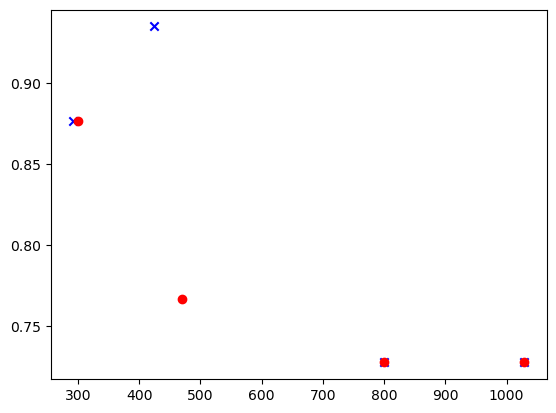

In [20]:
plt.figure()
for i in range(4):
    idx = torch.argmax(result_temp[:,i,2].flatten())
    plt.scatter(result_temp[idx,i,3],result_temp[idx,i,2], color = 'blue', label = 'PT', marker = 'x')
    plt.scatter(result_temp[idx,i,7],result_temp[idx,i,6], color = 'red', label = 'FT')
    # plt.scatter(result_temp[idx,i,11],result_temp[idx,i,10], color = 'orange')

In [23]:
result_temp[:,1,2].flatten(), torch.argmax(result_temp[:,1,2].flatten())

(tensor([0.7273, 0.9351, 0.8117, 0.7273, 0.7273, 0.9221, 0.5260, 0.7273, 0.7273,
         0.7273]),
 tensor(1))